# Problem Statement


XYZ Loan company has been receiving a lot of loan application with the current process requiring staff to review the loan application. This results in a long waiting time and not having enough resources to process the loan application. 

The stakeholders would like to automate the process to identify which group of customer are more likely to have loan approved to **improve the loan application turnaround time** as well as to **improve staff efficiency** and target these groups of customer.


**Dataset Dictionary**

| Variable | Description |
| :--- | :---   |
| Loan_ID | Unique Loan ID |
|Gender	|Male/ Female |
|Married | Applicant married (Y/N)|
|Dependents | Number of dependents|
|Education | Applicant Education (Graduate/ Under Graduate)|
|Self_Employed | Self employed (Y/N)|
|ApplicantIncome | Applicant income|
|CoapplicantIncome | Coapplicant income|
|LoanAmount | Loan amount in thousands|
|Loan_Amount_Term |	Term of loan in months|
|Credit_History | credit history meets guidelines|
|Property_Area | Urban/ Semi Urban/ Rural|
|Loan_Status |Loan approved (Y/N)|
	


# Agenda


1. Data Cleansing
- Check for missing values and duplicate

2. EDA (Explortory Data Analysis)
- Analyse the data distribution pattern
- Encode the data
- Analyse the correlation using heatmap and Pairplot

3. Apply ML Algorithm
- Split the train and test dataset
- Apply different ML Alogorithm using Log Regression, KNN and Decision Tree

4. Evaluate the model performance

5. Improved the model using Grid Search
6. Summary
7. Limitation

# Import Packages

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#import the package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Import Data

In [3]:
#import dataset
df = pd.read_csv('loan_train.csv')

df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Cleaning

## Data Cleaning for Training Data

In [4]:
#get to know the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#https://anaconda.org/conda-forge/pandas-profiling

#from pandas_profiling import ProfileReport
#prof = ProfileReport(df)
#prof.to_file(output_file='output.html')

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>, <Axes: >]],
      dtype=object)

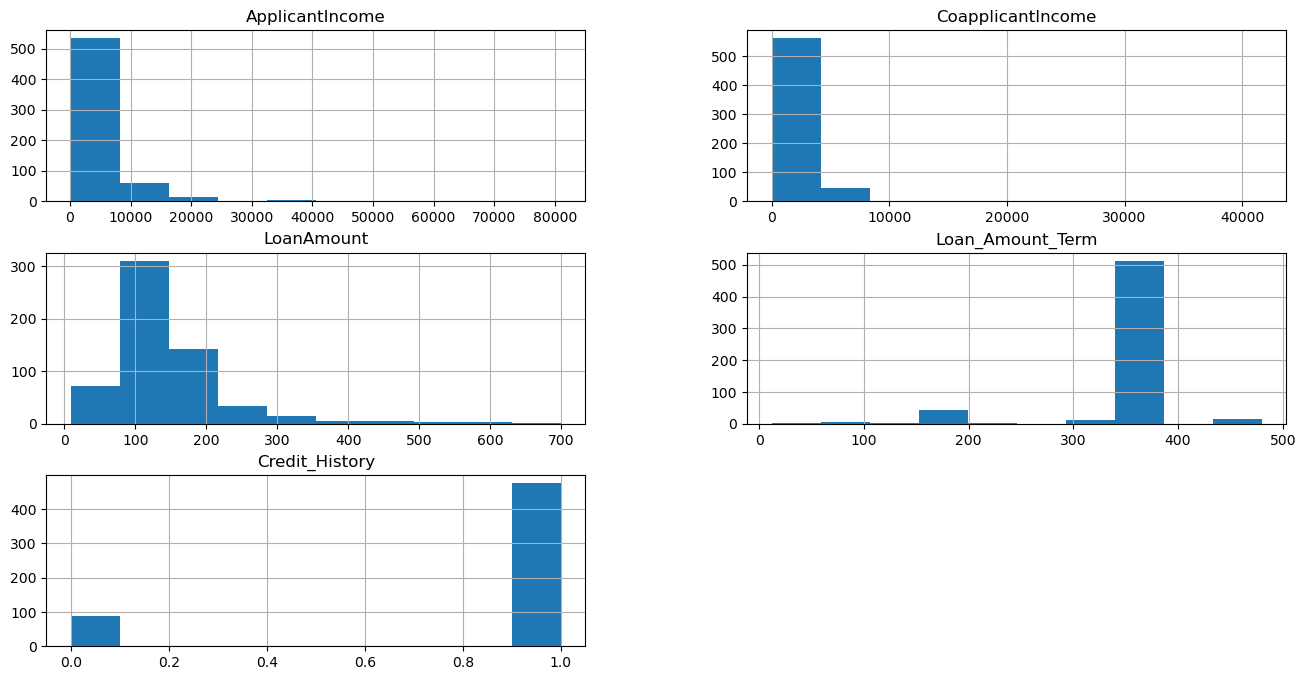

In [6]:
#check the distribution
df.hist(figsize=(16,8))

## Handling the Null Values

In [7]:
# duplicate a dataset to clean the data
df_train = df.copy()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# check no of missing value
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#fill Missing value
category_columns=df.select_dtypes(include=['object']).columns.tolist()
integer_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df:
    if df[column].isnull().any():
        if(column in category_columns):
            df_train[column]=df[column].fillna(df[column].mode()[0]) #For Categorical data, impute using mode
        else:
            df_train[column]=df[column].fillna(df[column].median()) #For Numerical data, impute using mode

In [10]:
#noted that the columns Credit_History in float64 but it is a categorial data
df_train['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df_train['Credit_History'] = df_train['Credit_History'].astype(int)

In [11]:
#verify data
df_train['Gender'].value_counts()
df_train['Married'].value_counts()
df_train['Dependents'].value_counts()
df_train['Credit_History'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

Yes    401
No     213
Name: Married, dtype: int64

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

1    525
0     89
Name: Credit_History, dtype: int64

In [12]:
df_train.isna().sum()
df_train.info()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int32  
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 60.1+ KB


## Check for Duplicates

In [13]:
#check if data have any duplicate

df_train.duplicated().sum()

0

## Data Cleaning for Test Data

In [14]:
df_test = pd.read_csv('loan_test.csv')
df_test.head(10)
df_test.info()
df_test.isna().sum()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
#fill Missing value
category_columns=df_test.select_dtypes(include=['object']).columns.tolist()
integer_columns=df_test.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df_test:
    if df_test[column].isnull().any():
        if(column in category_columns):
            df_test[column]=df_test[column].fillna(df_test[column].mode()[0]) #For Categorical data, impute using mode
        else:
            df_test[column]=df_test[column].fillna(df_test[column].median()) #For Numerical data, impute using mode

In [16]:
#noted that the columns Credit_History in float64 but it is a categorial data
df_test['Credit_History'] = df_test['Credit_History'].fillna(df['Credit_History'].mode()[0])
df_test['Credit_History'] = df_test['Credit_History'].astype(int)

In [17]:
df_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
#verify data
df_test.info()
df_test['Gender'].value_counts()
df_test['Married'].value_counts()
df_test['Dependents'].value_counts()
df_test['Credit_History'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int32  
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 60.1+ KB


Male      502
Female    112
Name: Gender, dtype: int64

Yes    401
No     213
Name: Married, dtype: int64

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

1    525
0     89
Name: Credit_History, dtype: int64

# Exploratory Data Analysis

In [19]:
#For Train data
df_train["TotalApplicantIncome"]=df_train["ApplicantIncome"]+df_train["CoapplicantIncome"]
df_train["TotalApplicantIncome"]

df_train.head(10)

#For test data
df_test["TotalApplicantIncome"]=df_test["ApplicantIncome"]+df_test["CoapplicantIncome"]
df_test["TotalApplicantIncome"]

df_test.head(10)

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: TotalApplicantIncome, Length: 614, dtype: float64

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalApplicantIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1,Urban,Y,9613.0
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1,Urban,Y,3849.0
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0,Semiurban,N,5540.0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1,Urban,Y,5532.0
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1,Semiurban,N,23809.0


0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: TotalApplicantIncome, Length: 614, dtype: float64

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalApplicantIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1,Urban,Y,9613.0
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1,Urban,Y,3849.0
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0,Semiurban,N,5540.0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1,Urban,Y,5532.0
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1,Semiurban,N,23809.0


Loan_Status,N,Y
Income_Cat,,
<= 1000,3,3
<= 5000,130,287
<= 10000,42,97
<= 15000,10,17
<= 20000,3,10
> 20000,3,8


array([<Axes: title={'center': 'N'}>, <Axes: title={'center': 'Y'}>],
      dtype=object)

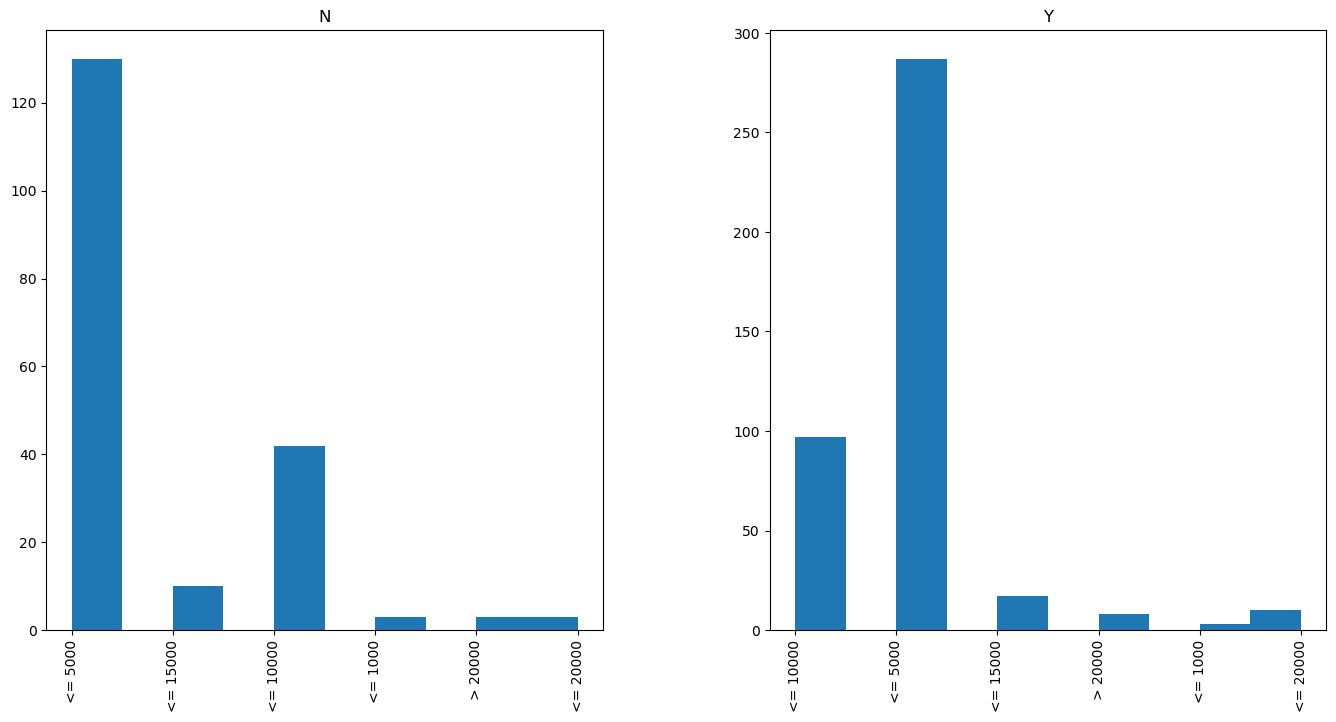

In [20]:
# To find out if the total income are one of the factor for loan approval?

bins_size=[0,1000,5000,10000,15000, 20000, 80000]
group=['<= 1000','<= 5000','<= 10000','<= 15000', '<= 20000', '> 20000']
df_train['Income_Cat']=pd.cut(df_train['ApplicantIncome'],bins_size, labels=group)

pd.crosstab(df_train["Income_Cat"],df_train["Loan_Status"])

df_train['Income_Cat'].hist(by=df_train['Loan_Status'], figsize=(16,8))

In [21]:
bins_size=[0,2000,5000,10000,15000, 20000, 80000]
group=['<= 2000','>2000 x <= 5000','<= 10000','<= 15000', '<= 20000', '> 20000']
df_train['TotalIncome_Cat']=pd.cut(df_train['TotalApplicantIncome'],bins_size, labels=group)

pd.crosstab(df_train["TotalIncome_Cat"],df_train["Loan_Status"])

Loan_Status,N,Y
TotalIncome_Cat,,
<= 2000,5,1
>2000 x <= 5000,84,180
<= 10000,74,183
<= 15000,15,36
<= 20000,5,13
> 20000,8,9


**Finding : It seems like total income with > 2000 have higher chances. There's not much impact if the main applicant is having lesser income than co-applicant**

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


<Axes: xlabel='Property_Area'>

Text(0.5, 1.0, 'Applicant Income by Loan Status')

Text(0, 0.5, 'Loan Status')

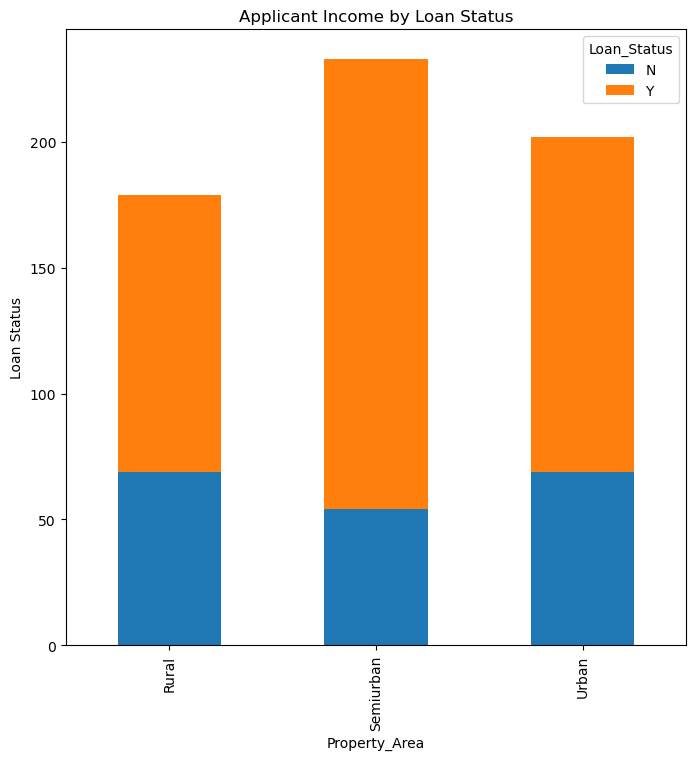

In [22]:
# To find out if the Property Area are one of the factor for loan approval?

pd.crosstab(df_train["Property_Area"],df_train["Loan_Status"])
property_chart = df_train.groupby(['Property_Area','Loan_Status']).size().unstack()

property_chart.plot(kind='bar',stacked=True, figsize=(8,8))
plt.title("Applicant Income by Loan Status")
# plt.xlabel("Property Area")
plt.ylabel("Loan Status")


Loan_Status,N,Y
Dependents,,
0,113,247
1,36,66
2,25,76
3+,18,33


<Axes: xlabel='Dependents'>

Text(0.5, 1.0, 'Dependents by Loan Status')

Text(0, 0.5, 'Loan Status')

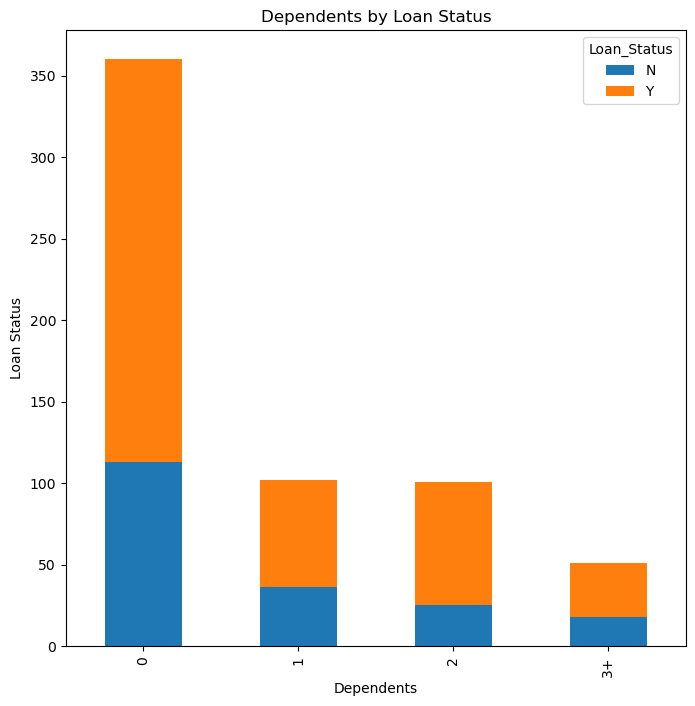

In [23]:
# To find out if the Dependents are one of the factor for loan approval?

pd.crosstab(df_train["Dependents"],df_train["Loan_Status"])
d_chart = df_train.groupby(['Dependents','Loan_Status']).size().unstack()

d_chart.plot(kind='bar',stacked=True, figsize=(8,8))
plt.title("Dependents by Loan Status")
# plt.xlabel("Property Area")
plt.ylabel("Loan Status")


Loan_Status,N,Y
Self_Employed,,
No,166,366
Yes,26,56


<Axes: xlabel='Self_Employed'>

Text(0.5, 1.0, 'Self_Employed by Loan Status')

Text(0, 0.5, 'Loan Status')

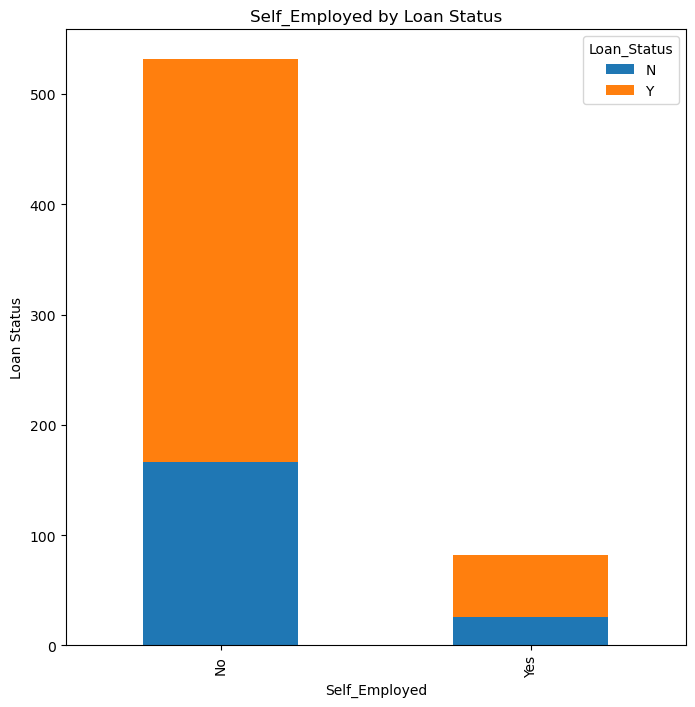

In [24]:
# To find out if the Dependents are one of the factor for loan approval?

pd.crosstab(df_train["Self_Employed"],df_train["Loan_Status"])
d_chart = df_train.groupby(['Self_Employed','Loan_Status']).size().unstack()

d_chart.plot(kind='bar',stacked=True, figsize=(8,8))
plt.title("Self_Employed by Loan Status")
# plt.xlabel("Property Area")
plt.ylabel("Loan Status")

In [25]:
# Check loan status by gender
df_train.groupby(['Loan_Status', 'Gender']).size()

Loan_Status  Gender
N            Female     37
             Male      155
Y            Female     75
             Male      347
dtype: int64

In [26]:
# Check loan status by education
df_train.groupby(['Loan_Status', 'Education']).size()

Loan_Status  Education   
N            Graduate        140
             Not Graduate     52
Y            Graduate        340
             Not Graduate     82
dtype: int64

In [27]:
# Check loan status by marriage status and dependents
filterrow = df_train.LoanAmount > 0

df_train.where(filterrow).groupby(['Loan_Status', 'Married', 'Dependents']).size()

Loan_Status  Married  Dependents
N            No       0              63
                      1              10
                      2               3
                      3+              3
             Yes      0              50
                      1              26
                      2              22
                      3+             15
Y            No       0             112
                      1              13
                      2               5
                      3+              4
             Yes      0             135
                      1              53
                      2              71
                      3+             29
dtype: int64

**Finding : Applicant without dependent have higher chance in getting the loan.**

In [28]:
df_train.groupby(['Loan_Status', 'Credit_History']).size()

Loan_Status  Credit_History
N            0                  82
             1                 110
Y            0                   7
             1                 415
dtype: int64

**Finding : Applicant have more chances to get loan approved if they meet the credit history guideline = 1**

array([<Axes: title={'center': 'N'}>, <Axes: title={'center': 'Y'}>],
      dtype=object)

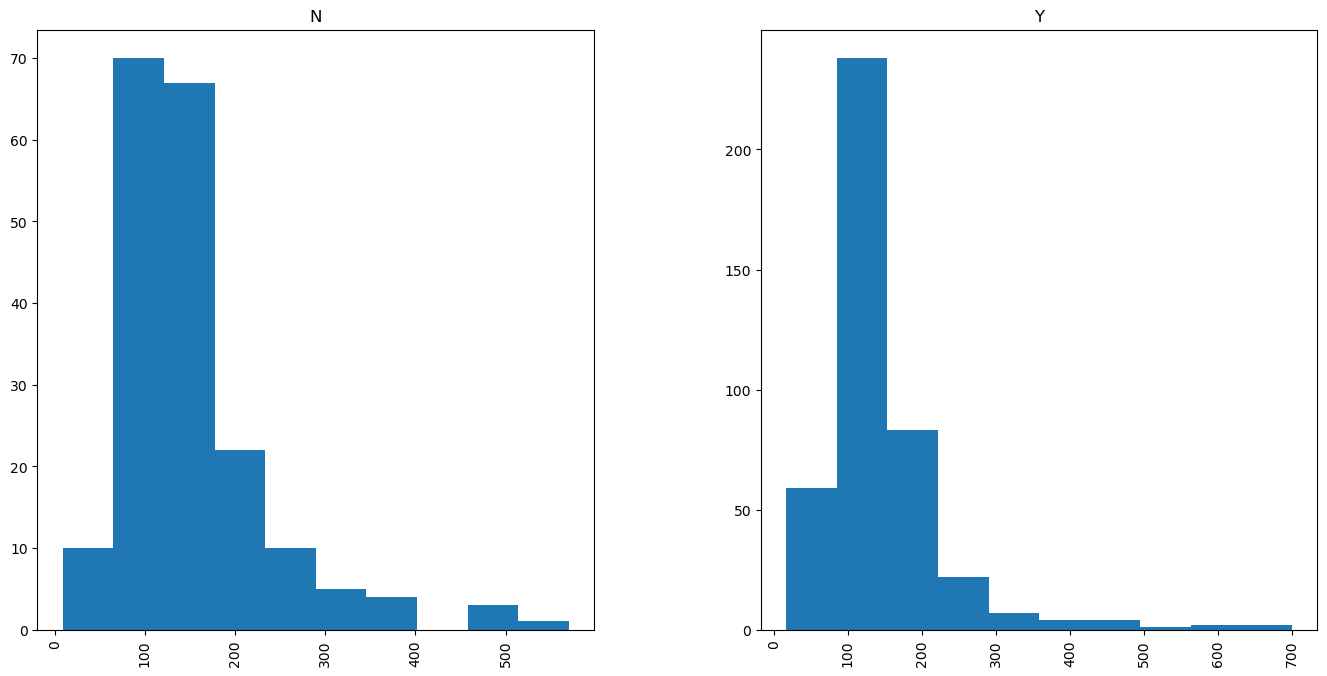

In [29]:
df_train['LoanAmount'].hist(by=df_train['Loan_Status'], figsize=(16,8))

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


<Axes: xlabel='Gender'>

Text(0.5, 1.0, 'Gender by Loan Status')

Text(0, 0.5, 'Loan Status')

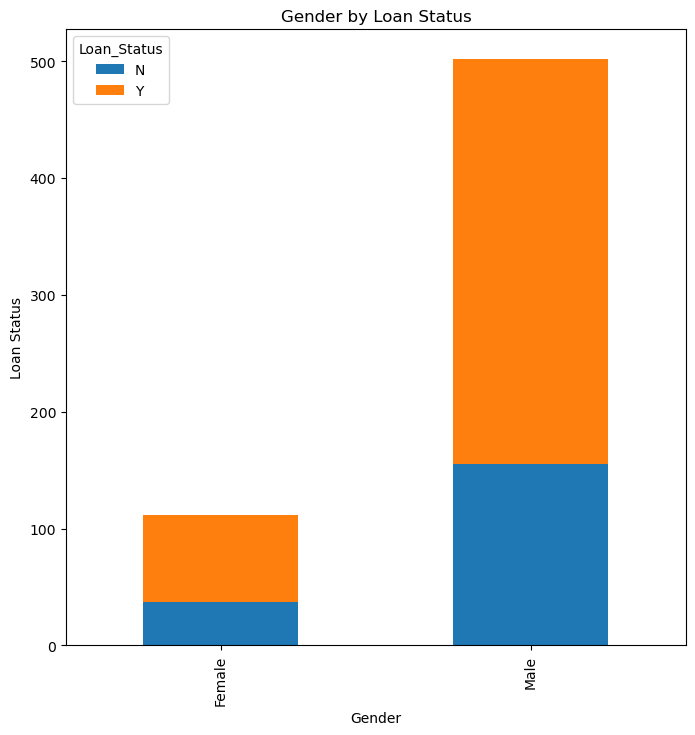

In [30]:
pd.crosstab(df_train["Gender"],df_train["Loan_Status"])
gender_chart = df_train.groupby(['Gender','Loan_Status']).size().unstack()

gender_chart.plot(kind='bar',stacked=True, figsize=(8,8))
plt.title("Gender by Loan Status")
# plt.xlabel("Property Area")
plt.ylabel("Loan Status")

**Finding : Male applicant high chance in getting loan.**

In [31]:
df_train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalApplicantIncome,Income_Cat,TotalIncome_Cat
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1,Urban,Y,5849.0,<= 10000,<= 10000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N,6091.0,<= 5000,<= 10000
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y,3000.0,<= 5000,>2000 x <= 5000


In [32]:
df_train = df_train.drop(['Income_Cat','TotalIncome_Cat','TotalApplicantIncome'], axis = 1)
df_test = df_test.drop(['TotalApplicantIncome'], axis = 1)


# Map Categorial to Numeric for Model Building

In [33]:
df_train['Dependents'].value_counts()
df_train['Dependents'].replace('3+',3,inplace=True)

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [34]:
#encode training data

df_mapping_dict = { 'Gender': {'Male': 1, 'Female': 0}, 
                 'Married': {'Yes': 1, 'No': 0 },
                 'Education': {'Graduate': 1, 'Not Graduate': 0 },
                 'Property_Area': {'Semiurban': 1, 'Urban': 2, 'Rural': 3 },
                 'Self_Employed': {'Yes': 1, 'No': 0 }  ,
                 'Loan_Status': {'Y': 1, 'N': 0 } 
               }
df_train['Gender'] = df_train['Gender'].map(df_mapping_dict['Gender'])
df_train['Married'] = df_train['Married'].map(df_mapping_dict['Married'])
df_train['Education'] = df_train['Education'].map(df_mapping_dict['Education'])
df_train['Property_Area'] = df_train['Property_Area'].map(df_mapping_dict['Property_Area'])
df_train['Self_Employed'] = df_train['Self_Employed'].map(df_mapping_dict['Self_Employed'])
df_train['Loan_Status'] = df_train['Loan_Status'].map(df_mapping_dict['Loan_Status'])

In [35]:
#encode test data
df_test['Gender'] = df_test['Gender'].map(df_mapping_dict['Gender'])
df_test['Married'] = df_test['Married'].map(df_mapping_dict['Married'])
df_test['Education'] = df_test['Education'].map(df_mapping_dict['Education'])
df_test['Property_Area'] = df_test['Property_Area'].map(df_mapping_dict['Property_Area'])
df_test['Self_Employed'] = df_test['Self_Employed'].map(df_mapping_dict['Self_Employed'])
df_test['Loan_Status'] = df_test['Loan_Status'].map(df_mapping_dict['Loan_Status'])

In [36]:
df_test['Dependents'].value_counts()
df_test['Dependents'].replace('3+',3,inplace=True)

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [37]:
df_train.head(10)
df_test.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1,3,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1,2,1
6,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1,2,1
7,LP001014,1,1,3,1,0,3036,2504.0,158.0,360.0,0,1,0
8,LP001018,1,1,2,1,0,4006,1526.0,168.0,360.0,1,2,1
9,LP001020,1,1,1,1,0,12841,10968.0,349.0,360.0,1,1,0


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1,3,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1,2,1
6,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1,2,1
7,LP001014,1,1,3,1,0,3036,2504.0,158.0,360.0,0,1,0
8,LP001018,1,1,2,1,0,4006,1526.0,168.0,360.0,1,2,1
9,LP001020,1,1,1,1,0,12841,10968.0,349.0,360.0,1,1,0


# Find Correlationship

C:\Users\Sharil Ashar\AppData\Local\Temp\ipykernel_22988\2550317306.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),cmap='Blues', annot = True)


<Axes: >

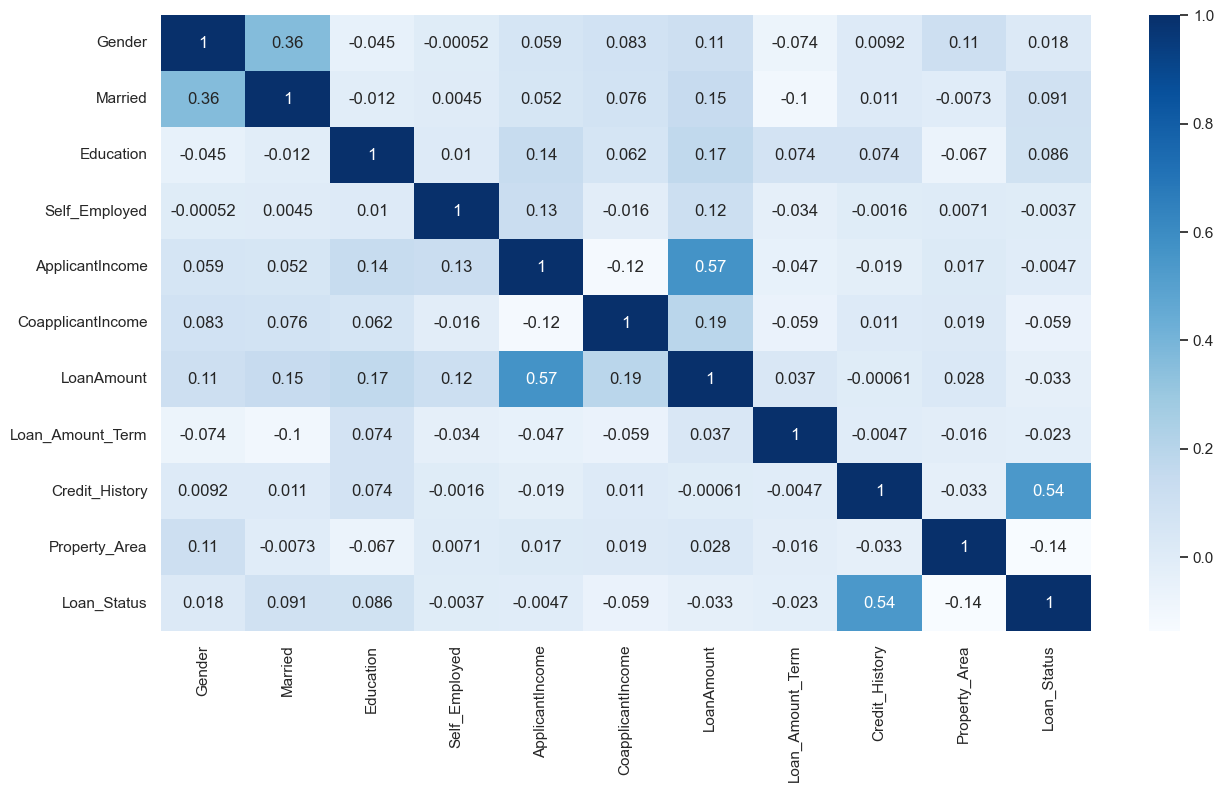

In [38]:
#To analyse the correlation between the variables
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_train.corr(),cmap='Blues', annot = True)

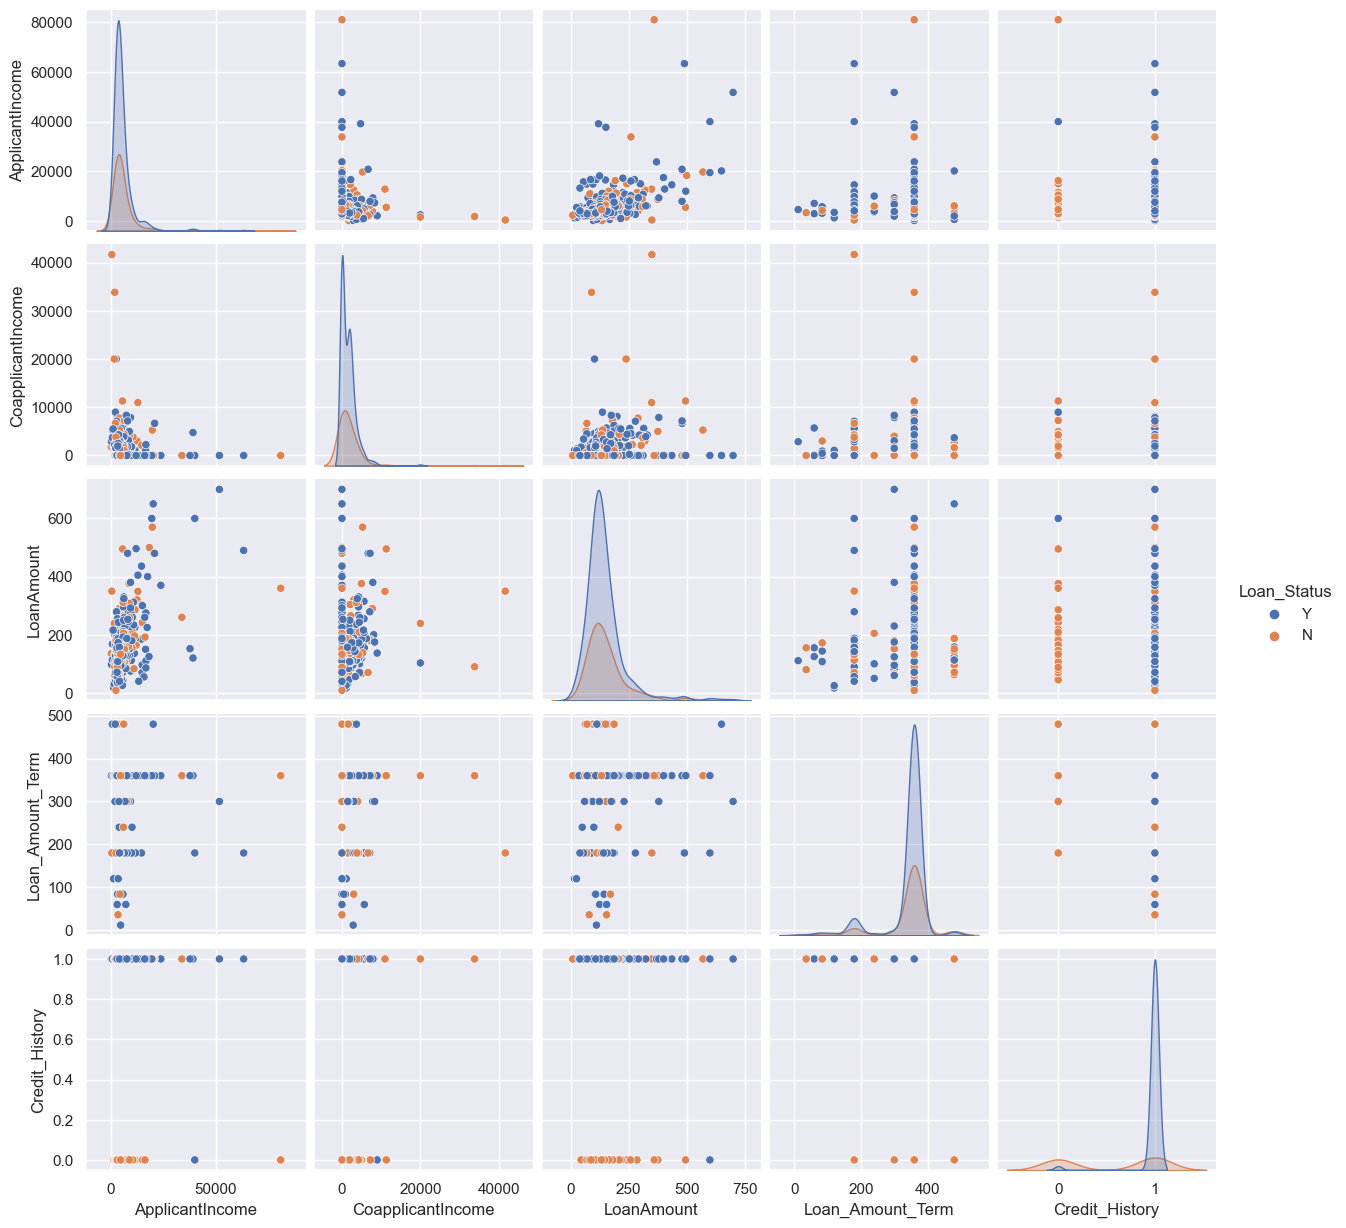

In [39]:
sns.pairplot(df,hue="Loan_Status")

# Apply Model

## Train, Test and Split Data

In [40]:
df_train=df_train.drop("Loan_ID",axis=1)
df_train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1,2,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1,3,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1,2,1


In [41]:
df_test=df_test.drop("Loan_ID",axis=1)
df_test.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1,2,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1,3,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1,2,1


In [42]:
X = df_train.drop('Loan_Status', axis = 1)
y = df_train[["Loan_Status"]]

In [43]:
from sklearn.model_selection import train_test_split

#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)
#random_state - Controls the shuffling applied to the data before applying the split. 
#Pass an int for reproducible output across multiple function calls

## Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#initialize logistic regression model

logreg = LogisticRegression()

#fit X_train and y_train
logreg.fit(X_train,y_train)

#use model to predict X_test
y_pred = logreg.predict(X_test)

#compare predictions to y_test
print("Accuracy:", accuracy_score(y_test, y_pred) *100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: 79.67479674796748


In [45]:
#Predict using available test data
df_test = df_test.drop('Loan_Status', axis = 1)


In [46]:
pred_test_logreg = logreg.predict(df_test)
pred_test_logreg

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,

## Decision Tree

In [47]:
# initialize model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=1)

#fit train data
dt_model.fit(X_train,y_train)

#predict test data
#X_test = si.transform(X_test)
y_pred_dt_model= dt_model.predict(X_test)

#compare predictions to y_test
print("Accuracy:", accuracy_score(y_test, y_pred_dt_model) *100)

DecisionTreeClassifier(random_state=1)

Accuracy: 70.73170731707317


## K-Nearest Neighbour

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

#compare predictions to y_test
print("Accuracy:", accuracy_score(y_test, y_pred_knn) *100)

Accuracy: 57.72357723577236


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Evaluate the Model for Decision Tree

## Confusion Matrix

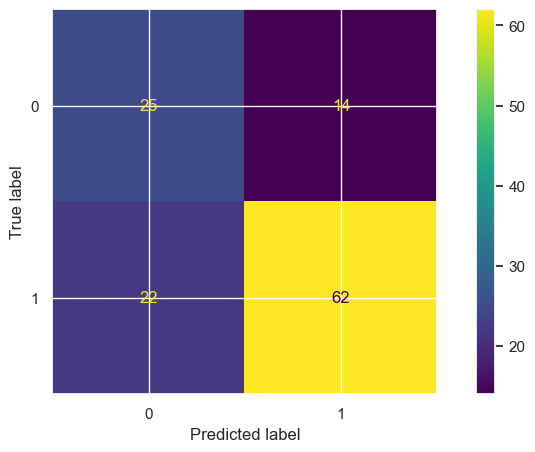

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,5)

cm = confusion_matrix(y_test, y_pred_dt_model) # calculate

cm_display = ConfusionMatrixDisplay(cm).plot() # visualize

## Plot AUC Chart

array([0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1.])

[]

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve')

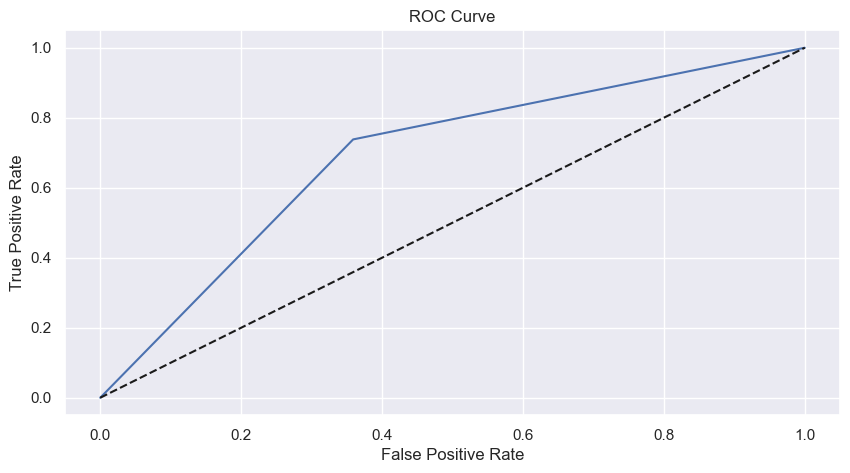

AUC score:  0.6895604395604396


In [51]:
# A plot of false positive rate on x against true positive rate on y
# Area under curve goes from 0.5 (random model) to 1 (ideal), although a worst than random model (<0.5) is possible
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import RocCurveDisplay
y_score = dt_model.predict_proba(X_test)[:,1]
y_score


fpr, tpr, threshold = roc_curve(y_test, y_score, pos_label=dt_model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr=fpr, tpr=tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print('AUC score: ',roc_auc_score(y_test, dt_model.predict(X_test))) 

## Use GridSearch to Improve Model

In [52]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=42)

parameters = {
        'max_depth': [1,2,3,4,5,6],
        'min_samples_leaf':[2,3,4],
        'min_samples_split': [10,20,30]
    
}

# Make a accuracy scoring object.
from sklearn.metrics import accuracy_score 
scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(clf, parameters, scoring=scorer, cv=20,n_jobs=-1)

grid_fit = grid_obj.fit(X_train, y_train)

# View results of GridSearchCV in DataFrame
pd.concat([pd.DataFrame(grid_fit.cv_results_["params"]),pd.DataFrame(grid_fit.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

# Get the estimator.
best_clf = grid_fit.best_estimator_

# Fit the new model.
best_clf.fit(X_train, y_train)

# Make predictions using the new model.
best_test_predictions = best_clf.predict(X_test)

# Get the accuracy score
accuracy_score(y_test,best_test_predictions)

,max_depth,min_samples_leaf,min_samples_split,Accuracy
0,1,2,10,0.810750
1,1,2,20,0.810750
2,1,2,30,0.810750
3,1,3,10,0.810750
4,1,3,20,0.810750
5,1,3,30,0.810750
6,1,4,10,0.810750
7,1,4,20,0.810750
8,1,4,30,0.810750
9,2,2,10,0.810750


DecisionTreeClassifier(max_depth=1, min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

0.8048780487804879

**Finding : After the GridSearch, the decision tree has improved from 70.7 to 80.5**

# Summary

1. From the data exploratory observation, below are the findings:
- It seems like total income with > 2000 have higher chances. There's not much impact if the main applicant is having lesser income than co-applicant

- The one apply the loan are not self-employed

- Applicant without dependent have higher chance in getting the loan.

- Male applicant high chance in getting loan.

- Not much impact on the loan amount, loan amount term.

2. ML algorithms findings:
-  Apply Logistic Regression, Decision Tree and KNN algorithm to address the issue.
- For Model Accuracy, Logistic Regression performed better with 79.7 as compared to Decision Tree with 70.7 and KNN with 57.7.
- After GridSearch, the decision tree has improved from 70.7 to 80.5
- Logistic Regression and Decision Tree are quite similiar in terms of result.


# Limitation

1. It would be good to have the age, existing loan with company or any debt for more analysis.
2. Applicant income not sure is it per month or annual as i did see a small subset of applicant with more than 20,000 are having very long loan period of 600 months.